In [1]:
# coding=utf-8
from scapy.all import *
import binascii
import struct
import time

import crcmod
import libnum

from scapy.layers.inet import IP, UDP
from scapy.layers.l2 import Ether

import sys
sys.path.append('/home/xalanaseon/scapy-cip-enip')
# insert at 1, 0 is the script path (or '' in REPL)
#sys.path.insert(1, '/home/xalanaseon/scapy-cip-enip')
from cip import CIP, CIP_Path
import cip
import numpy as np

packets = []

s_time = 0
c_time = 0
duration = 10 #time record in seconds
peaks = np.load("np_peaks_CRITIS.npy")
valleys = np.load("np_valleys_CRITIS.npy")
print(peaks[:,0])
print(np.diff(peaks[:,0]))
print(valleys[:,0])

N=100
queue = []
Detection_count = 0
Probability = 0

timespan = []
detected = []

### Convert ip address string to integer
def ip2long(ip):
    """
    Convert an IP string to long
    """
    packedIP = socket.inet_aton(ip)
    return struct.unpack("!L", packedIP)[0]

def packet_analysis(pkt):
    if IP in pkt and TCP in pkt:
        global s_time
        global c_time
        global Probability
        global queue
        if s_time == 0:
            s_time = pkt.time
            c_time = pkt.time
        #if len(pkt[TCP].payload) > 6:
        #print(pkt[CIP].SERVICE_CODES[pkt[CIP].service])
        #pkt.show()
        if(pkt[TCP].dport == 502):
            queue = [x for x in queue if abs(x[0] - pkt.time) < 1.0]
                
            time_diff = pkt.time - c_time
            peak_u = peaks[np.abs(peaks[:,0] - time_diff).argmin()][0]
            valley_u = valleys[np.abs(valleys[:,0] - time_diff).argmin()][0]
            bounds = np.abs(peak_u - valley_u)/2
            if np.abs(time_diff - peak_u) > bounds:
                queue.append([pkt.time,1])
                activated = [x[1] for x in queue if x[1] > 0]
                print(np.sum(activated))
                Probability = np.sum(activated)/len(queue)
                detected.append([pkt.time,1,Probability])
                #if (Probability > 0.7):
                    #print("This inter-arrival ",time_diff)
                    #print("Average inter-arrival ",peak_u)
                    #print("Out of bounds by ",np.abs(time_diff - peak_u))
                    #print("Alert! Out of order packets.")
                    #print("Probability ", Probability)
                    #print("Detected at ",time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(pkt.time)))
                print("Detected at ",time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(pkt.time)))    
            else:
                detected.append([pkt.time,0,Probability])
                queue.append([pkt.time,-1])   
                #print("Not detected at ",time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(pkt.time)))
                
            c_time = pkt.time
            #print(time.localtime(pkt.time))
                    

[0.07867868 0.09429429 0.10990991 0.14069069]
[0.01561562 0.01561562 0.03078078]
[0.08633634 0.1015015  0.10795796 0.11786787 0.12972973 0.13723724]


In [2]:
try:
    #sniff(offline='DataSet/captures1_v2/captures1_v2/modbusQueryFlooding/eth2dump-modbusQueryFlooding1m-0,5h_1.pcap', prn=packet_analysis, store=0, filter="src host 172.27.224.50 and dst host 172.27.224.250")
    sniff(offline='DataSet/captures1_v2/captures1_v2/mitm/eth2dump-mitm-change-1m-0,5h_1.pcap', prn=packet_analysis, store=0, filter="host 172.27.224.70 and dst 172.27.224.250")
    #sniff(offline='DataSet/Dex2019_0002_attack3.pcap', prn=packet_analysis, store=0, count=100000, filter="src host 192.168.1.10 and dst host 192.168.1.20")
    print('Completed')

except Exception as sniff_dec_err:
    traceback.print_exc()
    print(str(sniff_dec_err))

1
Detected at  2018-08-24 05:14:15
1
Detected at  2018-08-24 05:14:15
1
Detected at  2018-08-24 05:14:15
1
Detected at  2018-08-24 05:14:16
1
Detected at  2018-08-24 05:14:16
1
Detected at  2018-08-24 05:14:16
1
Detected at  2018-08-24 05:14:16
1
Detected at  2018-08-24 05:14:17
1
Detected at  2018-08-24 05:14:17
1
Detected at  2018-08-24 05:14:17
1
Detected at  2018-08-24 05:14:17
1
Detected at  2018-08-24 05:14:18
1
Detected at  2018-08-24 05:14:18
1
Detected at  2018-08-24 05:14:18
1
Detected at  2018-08-24 05:14:19
1
Detected at  2018-08-24 05:14:19
1
Detected at  2018-08-24 05:14:19
1
Detected at  2018-08-24 05:14:20
1
Detected at  2018-08-24 05:14:20
1
Detected at  2018-08-24 05:14:20
1
Detected at  2018-08-24 05:14:21
1
Detected at  2018-08-24 05:14:21
1
Detected at  2018-08-24 05:14:21
1
Detected at  2018-08-24 05:14:22
1
Detected at  2018-08-24 05:14:22
1
Detected at  2018-08-24 05:14:22
1
Detected at  2018-08-24 05:14:22
1
Detected at  2018-08-24 05:14:23
1
Detected at  2018-

<ipython-input-1-f2892240743a>:80: DeprecationWarning: an integer is required (got type EDecimal).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  print("Detected at ",time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(pkt.time)))



Detected at  2018-08-24 05:15:13
1
Detected at  2018-08-24 05:15:13
1
Detected at  2018-08-24 05:15:14
1
Detected at  2018-08-24 05:15:14
1
Detected at  2018-08-24 05:15:14
1
Detected at  2018-08-24 05:15:15
1
Detected at  2018-08-24 05:15:15
1
Detected at  2018-08-24 05:15:15
1
Detected at  2018-08-24 05:15:16
1
Detected at  2018-08-24 05:15:16
1
Detected at  2018-08-24 05:15:16
1
Detected at  2018-08-24 05:15:17
1
Detected at  2018-08-24 05:15:17
1
Detected at  2018-08-24 05:15:17
1
Detected at  2018-08-24 05:15:17
1
Detected at  2018-08-24 05:15:18
1
Detected at  2018-08-24 05:15:18
1
Detected at  2018-08-24 05:15:18
1
Detected at  2018-08-24 05:15:19
1
Detected at  2018-08-24 05:15:19
1
Detected at  2018-08-24 05:15:19
1
Detected at  2018-08-24 05:15:20
1
Detected at  2018-08-24 05:15:20
1
Detected at  2018-08-24 05:15:20
1
Detected at  2018-08-24 05:15:21
1
Detected at  2018-08-24 05:15:21
1
Detected at  2018-08-24 05:15:21
1
Detected at  2018-08-24 05:15:22
1
Detected at  2018-0

1
Detected at  2018-08-24 05:16:31
1
Detected at  2018-08-24 05:16:31
1
Detected at  2018-08-24 05:16:31
1
Detected at  2018-08-24 05:16:32
1
Detected at  2018-08-24 05:16:32
1
Detected at  2018-08-24 05:16:32
1
Detected at  2018-08-24 05:16:32
1
Detected at  2018-08-24 05:16:33
1
Detected at  2018-08-24 05:16:33
1
Detected at  2018-08-24 05:16:33
1
Detected at  2018-08-24 05:16:34
1
Detected at  2018-08-24 05:16:34
1
Detected at  2018-08-24 05:16:34
1
Detected at  2018-08-24 05:16:35
1
Detected at  2018-08-24 05:16:35
1
Detected at  2018-08-24 05:16:35
1
Detected at  2018-08-24 05:16:36
1
Detected at  2018-08-24 05:16:36
1
Detected at  2018-08-24 05:16:36
1
Detected at  2018-08-24 05:16:37
1
Detected at  2018-08-24 05:16:37
1
Detected at  2018-08-24 05:16:37
1
Detected at  2018-08-24 05:16:37
1
Detected at  2018-08-24 05:16:37
1
Detected at  2018-08-24 05:16:38
1
Detected at  2018-08-24 05:16:38
1
Detected at  2018-08-24 05:16:38
1
Detected at  2018-08-24 05:16:39
1
Detected at  2018-

Detected at  2018-08-24 05:17:51
1
Detected at  2018-08-24 05:17:51
1
Detected at  2018-08-24 05:17:51
1
Detected at  2018-08-24 05:17:51
1
Detected at  2018-08-24 05:17:52
1
Detected at  2018-08-24 05:17:52
1
Detected at  2018-08-24 05:17:52
1
Detected at  2018-08-24 05:17:53
1
Detected at  2018-08-24 05:17:53
1
Detected at  2018-08-24 05:17:53
1
Detected at  2018-08-24 05:17:54
1
Detected at  2018-08-24 05:17:54
1
Detected at  2018-08-24 05:17:54
1
Detected at  2018-08-24 05:17:55
1
Detected at  2018-08-24 05:17:55
1
Detected at  2018-08-24 05:17:55
1
Detected at  2018-08-24 05:17:56
1
Detected at  2018-08-24 05:17:56
1
Detected at  2018-08-24 05:17:56
1
Detected at  2018-08-24 05:17:56
1
Detected at  2018-08-24 05:17:57
1
Detected at  2018-08-24 05:17:57
1
Detected at  2018-08-24 05:17:57
1
Detected at  2018-08-24 05:17:58
1
Detected at  2018-08-24 05:17:58
1
Detected at  2018-08-24 05:17:58
1
Detected at  2018-08-24 05:17:59
1
Detected at  2018-08-24 05:17:59
1
Detected at  2018-08

Detected at  2018-08-24 05:19:33
1
Detected at  2018-08-24 05:19:34
1
Detected at  2018-08-24 05:19:34
1
Detected at  2018-08-24 05:19:34
1
Detected at  2018-08-24 05:19:35
1
Detected at  2018-08-24 05:19:35
1
Detected at  2018-08-24 05:19:35
1
Detected at  2018-08-24 05:19:35
1
Detected at  2018-08-24 05:19:36
1
Detected at  2018-08-24 05:19:36
1
Detected at  2018-08-24 05:19:36
1
Detected at  2018-08-24 05:19:36
1
Detected at  2018-08-24 05:19:37
1
Detected at  2018-08-24 05:19:37
1
Detected at  2018-08-24 05:19:37
1
Detected at  2018-08-24 05:19:37
1
Detected at  2018-08-24 05:19:37
1
Detected at  2018-08-24 05:19:38
1
Detected at  2018-08-24 05:19:38
1
Detected at  2018-08-24 05:19:38
1
Detected at  2018-08-24 05:19:38
1
Detected at  2018-08-24 05:19:39
1
Detected at  2018-08-24 05:19:39
1
Detected at  2018-08-24 05:19:39
1
Detected at  2018-08-24 05:19:39
1
Detected at  2018-08-24 05:19:40
1
Detected at  2018-08-24 05:19:40
1
Detected at  2018-08-24 05:19:40
1
Detected at  2018-08

Detected at  2018-08-24 05:20:57
1
Detected at  2018-08-24 05:20:58
1
Detected at  2018-08-24 05:20:58
1
Detected at  2018-08-24 05:20:58
1
Detected at  2018-08-24 05:20:59
1
Detected at  2018-08-24 05:20:59
1
Detected at  2018-08-24 05:20:59
1
Detected at  2018-08-24 05:21:00
1
Detected at  2018-08-24 05:21:00
1
Detected at  2018-08-24 05:21:00
1
Detected at  2018-08-24 05:21:01
1
Detected at  2018-08-24 05:21:01
1
Detected at  2018-08-24 05:21:01
1
Detected at  2018-08-24 05:21:01
1
Detected at  2018-08-24 05:21:02
1
Detected at  2018-08-24 05:21:02
1
Detected at  2018-08-24 05:21:02
1
Detected at  2018-08-24 05:21:03
1
Detected at  2018-08-24 05:21:03
1
Detected at  2018-08-24 05:21:03
1
Detected at  2018-08-24 05:21:04
1
Detected at  2018-08-24 05:21:04
1
Detected at  2018-08-24 05:21:04
1
Detected at  2018-08-24 05:21:05
1
Detected at  2018-08-24 05:21:05
1
Detected at  2018-08-24 05:21:05
1
Detected at  2018-08-24 05:21:06
1
Detected at  2018-08-24 05:21:06
1
Detected at  2018-08

Detected at  2018-08-24 05:22:11
1
Detected at  2018-08-24 05:22:11
1
Detected at  2018-08-24 05:22:12
1
Detected at  2018-08-24 05:22:12
1
Detected at  2018-08-24 05:22:12
1
Detected at  2018-08-24 05:22:13
1
Detected at  2018-08-24 05:22:13
1
Detected at  2018-08-24 05:22:13
1
Detected at  2018-08-24 05:22:14
1
Detected at  2018-08-24 05:22:14
1
Detected at  2018-08-24 05:22:14
1
Detected at  2018-08-24 05:22:15
1
Detected at  2018-08-24 05:22:15
1
Detected at  2018-08-24 05:22:15
1
Detected at  2018-08-24 05:22:16
1
Detected at  2018-08-24 05:22:16
1
Detected at  2018-08-24 05:22:16
1
Detected at  2018-08-24 05:22:16
1
Detected at  2018-08-24 05:22:17
1
Detected at  2018-08-24 05:22:17
1
Detected at  2018-08-24 05:22:17
1
Detected at  2018-08-24 05:22:18
1
Detected at  2018-08-24 05:22:18
1
Detected at  2018-08-24 05:22:18
1
Detected at  2018-08-24 05:22:19
1
Detected at  2018-08-24 05:22:19
1
Detected at  2018-08-24 05:22:19
1
Detected at  2018-08-24 05:22:20
1
Detected at  2018-08

1
Detected at  2018-08-24 05:23:43
1
Detected at  2018-08-24 05:23:43
1
Detected at  2018-08-24 05:23:44
1
Detected at  2018-08-24 05:23:44
1
Detected at  2018-08-24 05:23:44
1
Detected at  2018-08-24 05:23:45
1
Detected at  2018-08-24 05:23:45
1
Detected at  2018-08-24 05:23:45
1
Detected at  2018-08-24 05:23:45
1
Detected at  2018-08-24 05:23:46
1
Detected at  2018-08-24 05:23:46
1
Detected at  2018-08-24 05:23:46
1
Detected at  2018-08-24 05:23:47
1
Detected at  2018-08-24 05:23:47
1
Detected at  2018-08-24 05:23:47
1
Detected at  2018-08-24 05:23:48
1
Detected at  2018-08-24 05:23:48
1
Detected at  2018-08-24 05:23:48
1
Detected at  2018-08-24 05:23:49
1
Detected at  2018-08-24 05:23:49
1
Detected at  2018-08-24 05:23:49
1
Detected at  2018-08-24 05:23:50
1
Detected at  2018-08-24 05:23:50
1
Detected at  2018-08-24 05:23:50
1
Detected at  2018-08-24 05:23:50
1
Detected at  2018-08-24 05:23:51
1
Detected at  2018-08-24 05:23:51
1
Detected at  2018-08-24 05:23:51
1
Detected at  2018-

1
Detected at  2018-08-24 05:24:57
1
Detected at  2018-08-24 05:24:57
1
Detected at  2018-08-24 05:24:57
1
Detected at  2018-08-24 05:24:58
1
Detected at  2018-08-24 05:24:58
1
Detected at  2018-08-24 05:24:58
1
Detected at  2018-08-24 05:24:59
1
Detected at  2018-08-24 05:24:59
1
Detected at  2018-08-24 05:24:59
1
Detected at  2018-08-24 05:25:00
1
Detected at  2018-08-24 05:25:00
1
Detected at  2018-08-24 05:25:00
1
Detected at  2018-08-24 05:25:00
1
Detected at  2018-08-24 05:25:01
1
Detected at  2018-08-24 05:25:01
1
Detected at  2018-08-24 05:25:01
1
Detected at  2018-08-24 05:25:02
1
Detected at  2018-08-24 05:25:02
1
Detected at  2018-08-24 05:25:02
1
Detected at  2018-08-24 05:25:03
1
Detected at  2018-08-24 05:25:03
1
Detected at  2018-08-24 05:25:03
1
Detected at  2018-08-24 05:25:04
1
Detected at  2018-08-24 05:25:04
1
Detected at  2018-08-24 05:25:04
1
Detected at  2018-08-24 05:25:05
1
Detected at  2018-08-24 05:25:05
1
Detected at  2018-08-24 05:25:05
1
Detected at  2018-

1
Detected at  2018-08-24 05:26:45
1
Detected at  2018-08-24 05:26:46
1
Detected at  2018-08-24 05:26:46
1
Detected at  2018-08-24 05:26:46
1
Detected at  2018-08-24 05:26:46
1
Detected at  2018-08-24 05:26:47
1
Detected at  2018-08-24 05:26:47
1
Detected at  2018-08-24 05:26:47
1
Detected at  2018-08-24 05:26:47
1
Detected at  2018-08-24 05:26:48
1
Detected at  2018-08-24 05:26:48
1
Detected at  2018-08-24 05:26:48
1
Detected at  2018-08-24 05:26:48
1
Detected at  2018-08-24 05:26:49
1
Detected at  2018-08-24 05:26:49
1
Detected at  2018-08-24 05:26:49
1
Detected at  2018-08-24 05:26:50
1
Detected at  2018-08-24 05:26:50
1
Detected at  2018-08-24 05:26:50
1
Detected at  2018-08-24 05:26:51
1
Detected at  2018-08-24 05:26:51
1
Detected at  2018-08-24 05:26:51
1
Detected at  2018-08-24 05:26:51
1
Detected at  2018-08-24 05:26:52
1
Detected at  2018-08-24 05:26:52
1
Detected at  2018-08-24 05:26:52
1
Detected at  2018-08-24 05:26:53
1
Detected at  2018-08-24 05:26:53
1
Detected at  2018-

Detected at  2018-08-24 05:28:09
1
Detected at  2018-08-24 05:28:10
1
Detected at  2018-08-24 05:28:10
1
Detected at  2018-08-24 05:28:10
1
Detected at  2018-08-24 05:28:10
1
Detected at  2018-08-24 05:28:11
1
Detected at  2018-08-24 05:28:11
1
Detected at  2018-08-24 05:28:11
1
Detected at  2018-08-24 05:28:12
1
Detected at  2018-08-24 05:28:12
1
Detected at  2018-08-24 05:28:12
1
Detected at  2018-08-24 05:28:13
1
Detected at  2018-08-24 05:28:13
1
Detected at  2018-08-24 05:28:13
1
Detected at  2018-08-24 05:28:14
1
Detected at  2018-08-24 05:28:14
1
Detected at  2018-08-24 05:28:14
1
Detected at  2018-08-24 05:28:15
1
Detected at  2018-08-24 05:28:15
1
Detected at  2018-08-24 05:28:15
1
Detected at  2018-08-24 05:28:15
1
Detected at  2018-08-24 05:28:16
1
Detected at  2018-08-24 05:28:16
1
Detected at  2018-08-24 05:28:16
1
Detected at  2018-08-24 05:28:17
1
Detected at  2018-08-24 05:28:17
1
Detected at  2018-08-24 05:28:17
1
Detected at  2018-08-24 05:28:18
1
Detected at  2018-08

Detected at  2018-08-24 05:29:48
1
Detected at  2018-08-24 05:29:48
1
Detected at  2018-08-24 05:29:49
1
Detected at  2018-08-24 05:29:49
1
Detected at  2018-08-24 05:29:49
1
Detected at  2018-08-24 05:29:50
1
Detected at  2018-08-24 05:29:50
1
Detected at  2018-08-24 05:29:50
1
Detected at  2018-08-24 05:29:50
1
Detected at  2018-08-24 05:29:51
1
Detected at  2018-08-24 05:29:51
1
Detected at  2018-08-24 05:29:51
1
Detected at  2018-08-24 05:29:52
1
Detected at  2018-08-24 05:29:52
1
Detected at  2018-08-24 05:29:52
1
Detected at  2018-08-24 05:29:53
1
Detected at  2018-08-24 05:29:53
1
Detected at  2018-08-24 05:29:53
1
Detected at  2018-08-24 05:29:54
1
Detected at  2018-08-24 05:29:54
1
Detected at  2018-08-24 05:29:54
1
Detected at  2018-08-24 05:29:55
1
Detected at  2018-08-24 05:29:55
1
Detected at  2018-08-24 05:29:55
1
Detected at  2018-08-24 05:29:55
1
Detected at  2018-08-24 05:29:56
1
Detected at  2018-08-24 05:29:56
1
Detected at  2018-08-24 05:29:56
1
Detected at  2018-08

1
Detected at  2018-08-24 05:31:10
1
Detected at  2018-08-24 05:31:11
1
Detected at  2018-08-24 05:31:11
1
Detected at  2018-08-24 05:31:11
1
Detected at  2018-08-24 05:31:12
1
Detected at  2018-08-24 05:31:12
1
Detected at  2018-08-24 05:31:12
1
Detected at  2018-08-24 05:31:13
1
Detected at  2018-08-24 05:31:13
1
Detected at  2018-08-24 05:31:13
1
Detected at  2018-08-24 05:31:14
1
Detected at  2018-08-24 05:31:14
1
Detected at  2018-08-24 05:31:14
1
Detected at  2018-08-24 05:31:14
1
Detected at  2018-08-24 05:31:15
1
Detected at  2018-08-24 05:31:15
1
Detected at  2018-08-24 05:31:15
1
Detected at  2018-08-24 05:31:16
1
Detected at  2018-08-24 05:31:16
1
Detected at  2018-08-24 05:31:16
1
Detected at  2018-08-24 05:31:17
1
Detected at  2018-08-24 05:31:17
1
Detected at  2018-08-24 05:31:17
1
Detected at  2018-08-24 05:31:18
1
Detected at  2018-08-24 05:31:18
1
Detected at  2018-08-24 05:31:18
1
Detected at  2018-08-24 05:31:19
1
Detected at  2018-08-24 05:31:19
1
Detected at  2018-

1
Detected at  2018-08-24 05:32:49
1
Detected at  2018-08-24 05:32:49
1
Detected at  2018-08-24 05:32:49
1
Detected at  2018-08-24 05:32:50
1
Detected at  2018-08-24 05:32:50
1
Detected at  2018-08-24 05:32:50
1
Detected at  2018-08-24 05:32:51
1
Detected at  2018-08-24 05:32:51
1
Detected at  2018-08-24 05:32:51
1
Detected at  2018-08-24 05:32:52
1
Detected at  2018-08-24 05:32:52
1
Detected at  2018-08-24 05:32:52
1
Detected at  2018-08-24 05:32:53
1
Detected at  2018-08-24 05:32:53
1
Detected at  2018-08-24 05:32:53
1
Detected at  2018-08-24 05:32:53
1
Detected at  2018-08-24 05:32:54
1
Detected at  2018-08-24 05:32:54
1
Detected at  2018-08-24 05:32:54
1
Detected at  2018-08-24 05:32:55
1
Detected at  2018-08-24 05:32:55
1
Detected at  2018-08-24 05:32:55
1
Detected at  2018-08-24 05:32:56
1
Detected at  2018-08-24 05:32:56
1
Detected at  2018-08-24 05:32:56
1
Detected at  2018-08-24 05:32:57
1
Detected at  2018-08-24 05:32:57
1
Detected at  2018-08-24 05:32:57
1
Detected at  2018-

Detected at  2018-08-24 05:34:10
1
Detected at  2018-08-24 05:34:11
1
Detected at  2018-08-24 05:34:11
1
Detected at  2018-08-24 05:34:11
1
Detected at  2018-08-24 05:34:12
1
Detected at  2018-08-24 05:34:12
1
Detected at  2018-08-24 05:34:12
1
Detected at  2018-08-24 05:34:13
1
Detected at  2018-08-24 05:34:13
1
Detected at  2018-08-24 05:34:13
1
Detected at  2018-08-24 05:34:14
1
Detected at  2018-08-24 05:34:14
1
Detected at  2018-08-24 05:34:14
1
Detected at  2018-08-24 05:34:14
1
Detected at  2018-08-24 05:34:15
1
Detected at  2018-08-24 05:34:15
1
Detected at  2018-08-24 05:34:15
1
Detected at  2018-08-24 05:34:16
1
Detected at  2018-08-24 05:34:16
1
Detected at  2018-08-24 05:34:16
1
Detected at  2018-08-24 05:34:17
1
Detected at  2018-08-24 05:34:17
1
Detected at  2018-08-24 05:34:17
1
Detected at  2018-08-24 05:34:18
1
Detected at  2018-08-24 05:34:18
1
Detected at  2018-08-24 05:34:18
1
Detected at  2018-08-24 05:34:19
1
Detected at  2018-08-24 05:34:19
1
Detected at  2018-08

Detected at  2018-08-24 05:35:33
1
Detected at  2018-08-24 05:35:33
1
Detected at  2018-08-24 05:35:34
1
Detected at  2018-08-24 05:35:34
1
Detected at  2018-08-24 05:35:34
1
Detected at  2018-08-24 05:35:34
1
Detected at  2018-08-24 05:35:35
1
Detected at  2018-08-24 05:35:35
1
Detected at  2018-08-24 05:35:35
1
Detected at  2018-08-24 05:35:36
1
Detected at  2018-08-24 05:35:36
1
Detected at  2018-08-24 05:35:36
1
Detected at  2018-08-24 05:35:37
1
Detected at  2018-08-24 05:35:37
1
Detected at  2018-08-24 05:35:37
1
Detected at  2018-08-24 05:35:38
1
Detected at  2018-08-24 05:35:38
1
Detected at  2018-08-24 05:35:38
1
Detected at  2018-08-24 05:35:39
1
Detected at  2018-08-24 05:35:39
1
Detected at  2018-08-24 05:35:39
1
Detected at  2018-08-24 05:35:39
1
Detected at  2018-08-24 05:35:40
1
Detected at  2018-08-24 05:35:40
1
Detected at  2018-08-24 05:35:40
1
Detected at  2018-08-24 05:35:41
1
Detected at  2018-08-24 05:35:41
1
Detected at  2018-08-24 05:35:41
1
Detected at  2018-08

Detected at  2018-08-24 05:36:59
1
Detected at  2018-08-24 05:36:59
1
Detected at  2018-08-24 05:36:59
1
Detected at  2018-08-24 05:36:59
1
Detected at  2018-08-24 05:37:00
1
Detected at  2018-08-24 05:37:00
1
Detected at  2018-08-24 05:37:00
1
Detected at  2018-08-24 05:37:01
1
Detected at  2018-08-24 05:37:01
1
Detected at  2018-08-24 05:37:01
1
Detected at  2018-08-24 05:37:02
1
Detected at  2018-08-24 05:37:02
1
Detected at  2018-08-24 05:37:02
1
Detected at  2018-08-24 05:37:03
1
Detected at  2018-08-24 05:37:03
1
Detected at  2018-08-24 05:37:03
1
Detected at  2018-08-24 05:37:04
1
Detected at  2018-08-24 05:37:04
1
Detected at  2018-08-24 05:37:04
1
Detected at  2018-08-24 05:37:04
1
Detected at  2018-08-24 05:37:05
1
Detected at  2018-08-24 05:37:05
1
Detected at  2018-08-24 05:37:05
1
Detected at  2018-08-24 05:37:06
1
Detected at  2018-08-24 05:37:06
1
Detected at  2018-08-24 05:37:06
1
Detected at  2018-08-24 05:37:07
1
Detected at  2018-08-24 05:37:07
1
Detected at  2018-08

Detected at  2018-08-24 05:38:29
1
Detected at  2018-08-24 05:38:29
1
Detected at  2018-08-24 05:38:29
1
Detected at  2018-08-24 05:38:30
1
Detected at  2018-08-24 05:38:30
1
Detected at  2018-08-24 05:38:30
1
Detected at  2018-08-24 05:38:31
1
Detected at  2018-08-24 05:38:31
1
Detected at  2018-08-24 05:38:31
1
Detected at  2018-08-24 05:38:32
1
Detected at  2018-08-24 05:38:32
1
Detected at  2018-08-24 05:38:32
1
Detected at  2018-08-24 05:38:33
1
Detected at  2018-08-24 05:38:33
1
Detected at  2018-08-24 05:38:33
1
Detected at  2018-08-24 05:38:33
1
Detected at  2018-08-24 05:38:34
1
Detected at  2018-08-24 05:38:34
1
Detected at  2018-08-24 05:38:34
1
Detected at  2018-08-24 05:38:34
1
Detected at  2018-08-24 05:38:35
1
Detected at  2018-08-24 05:38:35
1
Detected at  2018-08-24 05:38:35
1
Detected at  2018-08-24 05:38:36
1
Detected at  2018-08-24 05:38:36
1
Detected at  2018-08-24 05:38:36
1
Detected at  2018-08-24 05:38:37
1
Detected at  2018-08-24 05:38:37
1
Detected at  2018-08

1
Detected at  2018-08-24 05:39:52
1
Detected at  2018-08-24 05:39:52
1
Detected at  2018-08-24 05:39:52
1
Detected at  2018-08-24 05:39:53
1
Detected at  2018-08-24 05:39:53
1
Detected at  2018-08-24 05:39:53
1
Detected at  2018-08-24 05:39:53
1
Detected at  2018-08-24 05:39:54
1
Detected at  2018-08-24 05:39:54
1
Detected at  2018-08-24 05:39:54
1
Detected at  2018-08-24 05:39:55
1
Detected at  2018-08-24 05:39:55
1
Detected at  2018-08-24 05:39:55
1
Detected at  2018-08-24 05:39:56
1
Detected at  2018-08-24 05:39:56
1
Detected at  2018-08-24 05:39:56
1
Detected at  2018-08-24 05:39:57
1
Detected at  2018-08-24 05:39:57
1
Detected at  2018-08-24 05:39:57
1
Detected at  2018-08-24 05:39:58
1
Detected at  2018-08-24 05:39:58
1
Detected at  2018-08-24 05:39:58
1
Detected at  2018-08-24 05:39:58
1
Detected at  2018-08-24 05:39:59
1
Detected at  2018-08-24 05:39:59
1
Detected at  2018-08-24 05:39:59
1
Detected at  2018-08-24 05:40:00
1
Detected at  2018-08-24 05:40:00
1
Detected at  2018-

Detected at  2018-08-24 05:41:10
1
Detected at  2018-08-24 05:41:11
1
Detected at  2018-08-24 05:41:11
1
Detected at  2018-08-24 05:41:11
1
Detected at  2018-08-24 05:41:12
1
Detected at  2018-08-24 05:41:12
1
Detected at  2018-08-24 05:41:12
1
Detected at  2018-08-24 05:41:12
1
Detected at  2018-08-24 05:41:13
1
Detected at  2018-08-24 05:41:13
1
Detected at  2018-08-24 05:41:13
1
Detected at  2018-08-24 05:41:14
1
Detected at  2018-08-24 05:41:14
1
Detected at  2018-08-24 05:41:14
1
Detected at  2018-08-24 05:41:15
1
Detected at  2018-08-24 05:41:15
1
Detected at  2018-08-24 05:41:15
1
Detected at  2018-08-24 05:41:16
1
Detected at  2018-08-24 05:41:16
1
Detected at  2018-08-24 05:41:16
1
Detected at  2018-08-24 05:41:17
1
Detected at  2018-08-24 05:41:17
1
Detected at  2018-08-24 05:41:17
1
Detected at  2018-08-24 05:41:17
1
Detected at  2018-08-24 05:41:18
1
Detected at  2018-08-24 05:41:18
1
Detected at  2018-08-24 05:41:18
1
Detected at  2018-08-24 05:41:19
1
Detected at  2018-08

Detected at  2018-08-24 05:42:26
1
Detected at  2018-08-24 05:42:27
1
Detected at  2018-08-24 05:42:27
1
Detected at  2018-08-24 05:42:27
1
Detected at  2018-08-24 05:42:28
1
Detected at  2018-08-24 05:42:28
1
Detected at  2018-08-24 05:42:28
1
Detected at  2018-08-24 05:42:29
1
Detected at  2018-08-24 05:42:29
1
Detected at  2018-08-24 05:42:29
1
Detected at  2018-08-24 05:42:30
1
Detected at  2018-08-24 05:42:30
1
Detected at  2018-08-24 05:42:30
1
Detected at  2018-08-24 05:42:31
1
Detected at  2018-08-24 05:42:31
1
Detected at  2018-08-24 05:42:31
1
Detected at  2018-08-24 05:42:31
1
Detected at  2018-08-24 05:42:32
1
Detected at  2018-08-24 05:42:32
1
Detected at  2018-08-24 05:42:32
1
Detected at  2018-08-24 05:42:33
1
Detected at  2018-08-24 05:42:33
1
Detected at  2018-08-24 05:42:33
1
Detected at  2018-08-24 05:42:34
1
Detected at  2018-08-24 05:42:34
1
Detected at  2018-08-24 05:42:34
1
Detected at  2018-08-24 05:42:35
1
Detected at  2018-08-24 05:42:35
1
Detected at  2018-08

Detected at  2018-08-24 05:43:55
1
Detected at  2018-08-24 05:43:55
1
Detected at  2018-08-24 05:43:56
1
Detected at  2018-08-24 05:43:56
1
Detected at  2018-08-24 05:43:56
1
Detected at  2018-08-24 05:43:57
1
Detected at  2018-08-24 05:43:57
1
Detected at  2018-08-24 05:43:57
1
Detected at  2018-08-24 05:43:58
1
Detected at  2018-08-24 05:43:58
1
Detected at  2018-08-24 05:43:58
1
Detected at  2018-08-24 05:43:59
1
Detected at  2018-08-24 05:43:59
1
Detected at  2018-08-24 05:43:59
1
Detected at  2018-08-24 05:44:00
1
Detected at  2018-08-24 05:44:00
1
Detected at  2018-08-24 05:44:00
1
Detected at  2018-08-24 05:44:00
1
Detected at  2018-08-24 05:44:01
1
Detected at  2018-08-24 05:44:01
1
Detected at  2018-08-24 05:44:01
1
Detected at  2018-08-24 05:44:02
1
Detected at  2018-08-24 05:44:02
1
Detected at  2018-08-24 05:44:02
1
Detected at  2018-08-24 05:44:03
1
Detected at  2018-08-24 05:44:03
1
Detected at  2018-08-24 05:44:03
1
Detected at  2018-08-24 05:44:04
1
Detected at  2018-08

<ipython-input-4-139350091499>:8: DeprecationWarning: an integer is required (got type EDecimal).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  dates=[datetime.fromtimestamp(ts[0]) for ts in detected]


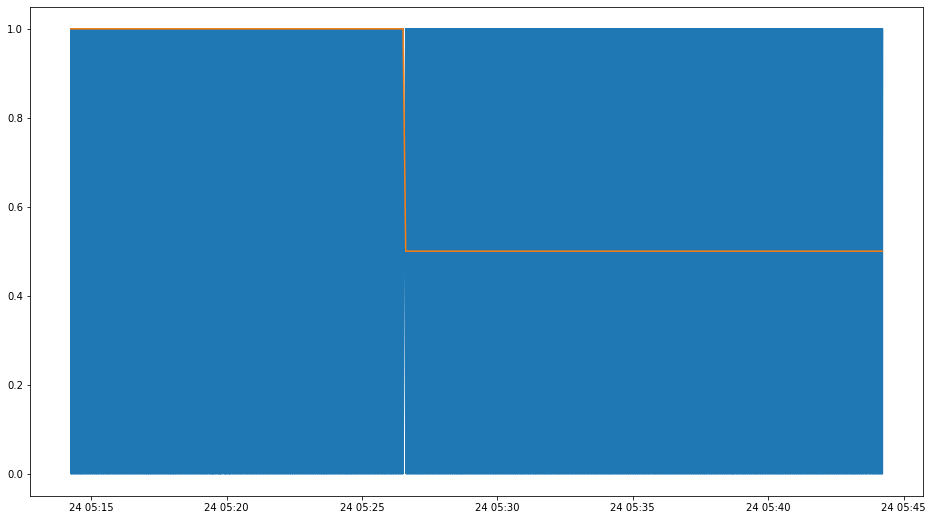

In [4]:
from numpy import array, linspace
from sklearn.neighbors import KernelDensity
from matplotlib.pyplot import plot
from scipy.signal import argrelextrema
from scipy.signal import find_peaks

import datetime as dt
dates=[datetime.fromtimestamp(ts[0]) for ts in detected]

values=[x[1] for x in detected]
probs=[x[2] for x in detected]
k = [x for x in detected if x[1]==0]
#print(k)
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(dates,values)
ax.plot(dates,probs)